# How Israel's Strike on Qatar Shatters the Middle East

**Source:** [YouTube Video](https://youtu.be/eZM2Ik-FHEU?si=tfgYdqRTDJAG69iv)  
**Channel:** CaspianReport  
**Generated:** September 15, 2025


## Load data

I used Claude Desctop with youtube_transcript MCP for extracting video subtitles\
and formatting them into Markdown document\
For comments scrapping I used Scrapecreators API\
Take a look at DataCollection notebook for more details

**Links**
- youtube_transcript MCP: https://hub.docker.com/r/mcp/youtube-transcript
- Scrapecreators API: https://app.scrapecreators.com/playground

### Load video transcript

In [1]:
import dotenv
import pandas as pd

In [2]:
dotenv.load_dotenv()

with open('data/video_transcript.md', 'r', encoding='utf-8') as f:
    transcript = f.read()

### Load comments

In [3]:
df = pd.read_csv('data/youtube_comments.csv')

In [4]:
df.shape

(981, 4)

## Initialize DSPY

In [5]:
import os
import dspy
lm = dspy.LM("openai/gpt-5", api_key=os.environ["OPENAI_API_KEY"], api_base=os.environ["OPENAI_BASE_URL"], temperature=1.0, max_tokens=16000)
dspy.configure(lm=lm)

## Summarizing video

In [6]:
summarize = dspy.ChainOfThought('document -> summary')
response = summarize(document=transcript)
video_summary = response.summary

In [7]:
from IPython.display import Markdown
Markdown(video_summary)

- Event: Israel reportedly struck targets in Doha, Qatar, aiming at Hamas leaders Khalil al‑Haya and Khaled Mashal; both survived, while several mid‑level Hamas officials were killed. The video argues this likely crippled the most viable Gaza ceasefire channel.
- Mediation fallout: Qatar’s long‑standing role as a US‑backed mediator hosting Hamas is undermined; Israel signals willingness to conduct cross‑border assassinations despite diplomatic risks, eroding the notion of “safe havens.”
- US angle: With Al‑Udeid Air Base in Qatar, the US presence did not prevent strikes by Iran (June 2025) or Israel (now), leading the video to claim US security guarantees appear unreliable. Conflicting US–Qatar accounts about warnings further cloud Washington’s role.
- Technical claims: The range to Doha implies Israeli F‑35s likely needed aerial refueling; UK involvement is deemed unlikely due to incompatible tanker systems. Regardless of flight path (via Saudi/Jordan or Red Sea), the video argues US sensors would have detected and thus tacitly approved the operation—an assertion presented as inference, not proven fact.
- Qatar’s air defenses: Despite advanced systems (Patriot, THAAD, NASAMS, Skynex and modern fighters), no interception occurred. The video suggests prior awareness or pressure may explain the silence, while acknowledging this is speculative.
- Media/politics: The meeting allegedly followed a Trump‑pushed ceasefire offer; Hamas accuses the US of complicity. The video notes uneven media coverage, warning of distorted public perception.
- Regional implications: Qatar faces rising risk while hosting Hamas without productive mediation and is more likely to expel Hamas leadership. Mediation may shift to Egypt and the US but with limited leverage over Hamas; ceasefire prospects dim.
- Strategic shifts: Perceived US protection gaps may drive Doha to deepen ties with Turkey (already with troops in Qatar) and improve accommodation with Saudi Arabia/UAE.
- Bottom line: The strike signals Israel’s readiness to breach regional red lines; Qatar’s mediator model is collapsing, regional diplomacy is set back, and the Gaza conflict is likely to grind on with broader destabilizing repercussions.

In [8]:
size_share = len(video_summary) / len(transcript) * 100
print(f"Summary size is just {round(size_share, 2)}% from original document size")

Summary size is just 19.97% from original document size


## Likes distribution historgam
Let's take a look at likes distribution so we can draw a border between relevant comments based on number of likes and the rest that needs to be checked by LLM


🎯 Quick Insights:
• Most comments (66.6%) have 0 likes
• Average likes per comment: 12.4
• Top 10% of comments have ≥6 likes
• Correlation between likes and replies: 0.897


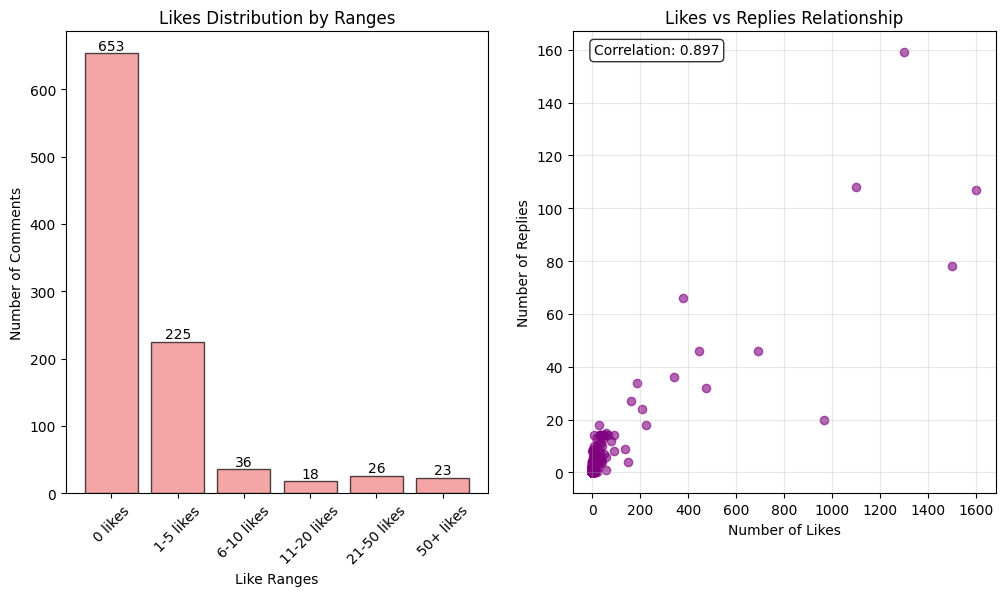

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming your DataFrame is called 'df'
# If it has a different name, replace 'df' with your DataFrame variable name

# =============================================================================
# METHOD 4: Customizable Histogram Function
# =============================================================================

def create_likes_histogram(df, bins=30, figsize=(10, 6), color='skyblue', 
                          show_stats=True, title="Distribution of Likes"):
    """
    Create a customizable histogram for likes data.
    
    Parameters:
    - df: DataFrame with 'likes' column
    - bins: Number of bins for histogram
    - figsize: Figure size (width, height)
    - color: Histogram color
    - show_stats: Whether to show statistics on plot
    - title: Plot title
    """
# =============================================================================
# METHOD 5: Histogram by Ranges
# =============================================================================

# Create histogram with specific ranges
plt.figure(figsize=(12, 6))

# Define like ranges
ranges = [(0, 0), (1, 5), (6, 10), (11, 20), (21, 50), (51, float('inf'))]
range_labels = ['0 likes', '1-5 likes', '6-10 likes', '11-20 likes', '21-50 likes', '50+ likes']
range_counts = []

for min_val, max_val in ranges:
    if max_val == float('inf'):
        count = (df['likes'] >= min_val).sum()
    else:
        count = ((df['likes'] >= min_val) & (df['likes'] <= max_val)).sum()
    range_counts.append(count)

# Create bar plot for ranges
plt.subplot(1, 2, 1)
bars = plt.bar(range_labels, range_counts, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Likes Distribution by Ranges')
plt.xlabel('Like Ranges')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, count in zip(bars, range_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom')

# =============================================================================
# METHOD 6: Compare Likes vs Replies
# =============================================================================


plt.subplot(1, 2, 2)
plt.scatter(df['likes'], df['replies'], alpha=0.6, color='purple')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Replies')
plt.title('Likes vs Replies Relationship')
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df['likes'].corr(df['replies'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

print("\n🎯 Quick Insights:")
print(f"• Most comments ({(df['likes'] == 0).mean()*100:.1f}%) have 0 likes")
print(f"• Average likes per comment: {df['likes'].mean():.1f}")
print(f"• Top 10% of comments have ≥{df['likes'].quantile(0.9):.0f} likes")
print(f"• Correlation between likes and replies: {df['likes'].corr(df['replies']):.3f}")

The histogram shows that it make sense to check on relevance comments with less than 6 likes

## Excluding irrelevant comments

Let's programmatically construct the promt that will filter out comments irrelevant to the topic of the video\
It make sense to do as a first step to save API costs resources - only relevant comments will undergo deeper reasoning later

In [10]:
from typing import Literal, List, Optional

class RelevanceAssesor(dspy.Signature):
    """
    Analyze and classify a YouTube comment in relation to a video about Israel's strike on Qatar.
    
    This signature performs relevance assessment of comment
    """
    
    # Input Fields
    document_summary: str = dspy.InputField(
        desc="Comprehensive summary of the video/document content providing context for analysis"
    )
    
    comment_text: str = dspy.InputField(
        desc="The full text of the YouTube comment to be analyzed"
    )

    score: int = dspy.OutputField(
        description="Relevance score from 1-5 (1=off-topic, 3=somewhat related, 5=directly addresses key points)"
    )
    confidence: float = dspy.OutputField(
        desc="Overall confidence in relevance assessments from 0.0 (very uncertain due to ambiguous language) to 1.0 (crystal clear position statements)"
    )

In [11]:
relevance_filter = dspy.ChainOfThought(RelevanceAssesor)

In [12]:
from pprint import pprint

result = relevance_filter(document_summary=video_summary, comment_text=df.loc[796].content)
pprint(result)

Prediction(
    reasoning='The comment aligns with a central claim of the video: that US security guarantees appear unreliable in light of strikes in Qatar despite the US presence. It extrapolates the broader implications—rising insecurity, isolation, and militarization—which the video also frames as regional destabilization and a breakdown of mediation. While emotionally expressive and not engaging technical specifics, it directly addresses a key point about waning US protection.',
    score=5,
    confidence=0.93
)


Let's see what prompt been automatically generated from Signature and passed to LLM

In [13]:
Markdown(relevance_filter.history[0]['messages'][0]['content'])

Your input fields are:
1. `document_summary` (str): Comprehensive summary of the video/document content providing context for analysis
2. `comment_text` (str): The full text of the YouTube comment to be analyzed
Your output fields are:
1. `reasoning` (str): 
2. `score` (int): Relevance score from 1-5 (1=off-topic, 3=somewhat related, 5=directly addresses key points)
3. `confidence` (float): Overall confidence in relevance assessments from 0.0 (very uncertain due to ambiguous language) to 1.0 (crystal clear position statements)
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## document_summary ## ]]
{document_summary}

[[ ## comment_text ## ]]
{comment_text}

[[ ## reasoning ## ]]
{reasoning}

[[ ## score ## ]]
{score}        # note: the value you produce must be a single int value

[[ ## confidence ## ]]
{confidence}        # note: the value you produce must be a single float value

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Analyze and classify a YouTube comment in relation to a video about Israel's strike on Qatar.
        
        This signature performs relevance assessment of comment

In [14]:
Markdown(relevance_filter.history[0]['response']['choices'][0]['message']['content'])

[[ ## reasoning ## ]]
The comment aligns with a central claim of the video: that US security guarantees appear unreliable in light of strikes in Qatar despite the US presence. It extrapolates the broader implications—rising insecurity, isolation, and militarization—which the video also frames as regional destabilization and a breakdown of mediation. While emotionally expressive and not engaging technical specifics, it directly addresses a key point about waning US protection.

[[ ## score ## ]]
5

[[ ## confidence ## ]]
0.93

[[ ## completed ## ]]

Let's split comments to verified and with low engagement

In [18]:
df_verified = df[df.likes >= 6]
df_low_engagement = df[df.likes < 6].copy()

Let's check how many comments do we need to asses on relevance

In [20]:
df_low_engagement.shape

(878, 4)

In [19]:
[c for c in df_low_engagement.loc[:5]['content']]

["it's not a conflict its a genocide",
 "Lured-in with promises of peace...\nWas that Braveheart? Burned in the stone house, the entire peace envoy.\nIf not it sure was this one weird trick back in the day for ridding yourself of Indians that your doctor won't tell you.",
 'with friends like these who needs enemies and i am not talking about isreal/usa and the arabs',
 'Qatar mediates while funding terrorism lol',
 'Funny the obvious route for Israel above Syria and Iraq has been forgotten. It did air-to-air refueling over these areas for their attacks  on Iran, so what would have stoped them this time...?']

Use asyncio to run concurrent requests to LLM

In [34]:
import numpy as np
import asyncio
from tqdm.asyncio import tqdm

# Split DataFrame into chunks of approximately 100 rows
chunk_size = 100
chunks = np.array_split(df_low_engagement['content'].tolist(), len(df_low_engagement) // chunk_size + 1)

async def process_chunk(comments_list, chunk_index):
    """Process a single chunk of data"""
    print(f"Processing chunk {chunk_index + 1} with {len(comments_list)} rows")
    
    max_concurrent = 10
    semaphore = asyncio.Semaphore(max_concurrent)
    async_relevance_filter = dspy.asyncify(relevance_filter)

    async def process_single_case_with_limit(text: str):
        """Process a single test case with concurrency limit"""
        async with semaphore:
            result = await async_relevance_filter(
                document_summary=video_summary, 
                comment_text=text
            ) 
            return result

    tasks = [
        process_single_case_with_limit(comment_text) 
        for comment_text in comments_list  # Fixed: removed enumerate()
    ]
    
    results = await tqdm.gather(*tasks, desc=f"Chunk {chunk_index + 1}")
    return results

# Process all chunks
all_results = []
for i, chunk in enumerate(chunks):
    if len(chunk) > 0:  # Skip empty chunks
        chunk_results = await process_chunk(chunk, i)
        all_results.extend(chunk_results)
        
        # Optional: Add delay between chunks to be nice to the API
        if i < len(chunks) - 1:  # Don't sleep after the last chunk
            await asyncio.sleep(1)

print(f"Processed {len(all_results)} total comments")

Processing chunk 1 with 98 rows


Chunk 1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [01:33<00:00,  1.05it/s]


Processing chunk 2 with 98 rows


Chunk 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [01:48<00:00,  1.11s/it]


Processing chunk 3 with 98 rows


Chunk 3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [01:56<00:00,  1.19s/it]


Processing chunk 4 with 98 rows


Chunk 4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [02:20<00:00,  1.43s/it]


Processing chunk 5 with 98 rows


Chunk 5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [02:16<00:00,  1.39s/it]


Processing chunk 6 with 97 rows


Chunk 6: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [02:26<00:00,  1.51s/it]


Processing chunk 7 with 97 rows


Chunk 7: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [02:38<00:00,  1.64s/it]


Processing chunk 8 with 97 rows


Chunk 8: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [02:10<00:00,  1.34s/it]


Processing chunk 9 with 97 rows


Chunk 9: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [02:14<00:00,  1.39s/it]

Processed 878 total comments


In [35]:
len(all_results)

878

In [36]:
all_results[0]

Prediction(
    reasoning="The comment makes a broad moral characterization of the broader Israel–Gaza war (“genocide”) rather than engaging with the video's specific topic: Israel’s reported strike in Doha, implications for Qatar’s mediation role, US involvement/sensors, air defenses, or regional diplomacy. It’s contextually related to the overarching conflict mentioned in the video but does not address any of the key analytical points.",
    score=3,
    confidence=0.78
)

Attaching score and confidence columns to dataframe

In [37]:
df_low_engagement = df_low_engagement.assign(relevance_score=[item.score for item in all_results])

In [38]:
df_low_engagement = df_low_engagement.assign(relevance_score_confidence=[item.confidence for item in all_results])

In [39]:
df_low_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 1 to 979
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   content                     878 non-null    object 
 1   published_at                878 non-null    object 
 2   likes                       878 non-null    int64  
 3   replies                     878 non-null    int64  
 4   relevance_score             878 non-null    int64  
 5   relevance_score_confidence  878 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 80.3+ KB


Make a backup to not run API calls again

In [40]:
df_low_engagement.to_csv('data/df_low_engagement.csv', index=False, encoding='utf-8')

In [51]:
df_junk_comments = df_low_engagement[(df_low_engagement['relevance_score'] < 3) & (df_low_engagement['relevance_score_confidence'] > 0.7)]

In [52]:
df_relevant_comments = df_low_engagement[(df_low_engagement['relevance_score'] >= 3) & (df_low_engagement['relevance_score_confidence'] > 0.7)]

### Let's explore irrelevant comments by looking at sample

In [54]:
len(df_junk_comments)

159

In [64]:
df_junk_comments.sample(20)['content'].tolist()

['your framing is bad on this.',
 'Bibi said Charlie Kirk was Hamas',
 'Israel, for long, has been a racist state, but now, under Shaitanyahu, it is a rogue, terrorist state!\nIt is now upon the world to hold it responsible/accountable & take it down! But, alas, we all know how this will play out............',
 "You're not objective when you talk about Israel and Russia. Portraying Russia as a boogeyman and giving excuses for Israel or Azerbaijan",
 ':face-blue-smiling::face-blue-smiling:',
 'Teşekkürler Şirvan.\nsevgiler',
 'People who are surprise by these brutality, Its all mention and allow by their Abrahmic gods "kill all innocent people and return back to kill remaining people" Its all written by their so called GODS',
 "Take away the Golan hights from that map, it's an occupied area.",
 'the state sponsor of ep$tein is a t@rrorist m@fia. that cancerous people have only bribery and blackmail. They selected Barabbas and will suffer the curse for all eternity.',
 'Nice reporting! K

### Now let's take a look at revevant comments sample

In [66]:
len(df_relevant_comments)

546

In [65]:
df_relevant_comments.sample(20)['content'].tolist()

["If anything shows you that Israel is the one who refuses to have peace in the Middle East, it's that their very long history of murdering or attempting to murder the people trying to broker peace.. They started these political assassinations with the killing a UN member back in 48. Israel has always been the number one terrorist faction of the Middle East its entire existance and the Zionist groups who created Isreal were the ones to first use terrorism in the middle east.",
 "I feel bad that you're bias is showing in this video but this is a war with an unrepentant enemy only happens on unconditional surrender will a ceasefire happen everything else the Killing needs to continue until the last man is standing",
 'Iran ordered it\nHamas started it\nGazans cheered it\nQatar fumbled it \nIsrael is ending it',
 'Its dangerous to be the enemy of the US but being its friend is fatal',
 'them arab leaders have fuked up = america is the cause of all the chaos in the area = they have made th

In [67]:
size_share = len(df_junk_comments) / len(df) * 100
print(f"{round(size_share, 2)}% of all comments are irrelevant")

16.21% of all comments are irrelevant


## Constructing dataframe that contains only relevant comments

In [80]:
all_relevant_comments = pd.concat([df_verified, df_relevant_comments[df_verified.columns]], ignore_index=True)

In [81]:
len(all_relevant_comments)

649

In [82]:
all_relevant_comments.to_csv('data/all_relevant_comments.csv', index=False, encoding='utf-8')

In [83]:
all_relevant_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       649 non-null    object
 1   published_at  649 non-null    object
 2   likes         649 non-null    int64 
 3   replies       649 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.4+ KB


## Multi-dimensional analysis for relevant comments

In [87]:
from enum import Enum

class VideoTopic(str, Enum):
    """Predefined topics from the video transcript"""
    ISRAEL = "Israel"
    QATAR = "Qatar"
    HAMAS = "Hamas"
    UNITED_STATES = "United States"
    TRUMP = "Trump"
    NETANYAHU = "Netanyahu"
    ISRAELI_STRIKE = "Israeli strike"
    QATAR_MEDIATION = "Qatar mediation"
    GAZA_CONFLICT = "Gaza conflict"
    US_INVOLVEMENT = "US involvement"
    CEASEFIRE_NEGOTIATIONS = "Ceasefire negotiations"
    AIR_DEFENSE = "Air defense systems"
    F35_AIRCRAFT = "F-35 aircraft"
    DIPLOMATIC_RELATIONS = "Diplomatic relations"

In [88]:
from typing import Literal, List, Optional

class ClassifyComment(dspy.Signature):
    """
    Analyze and classify a YouTube comment in relation to a video about Israel's strike on Qatar.
    
    This signature performs multi-dimensional analysis including topic identification,
    bias detection, and qualitative scoring of the comment's
    intellectual and emotional characteristics.
    """
    
    # Input Fields
    document_summary: str = dspy.InputField(
        desc="Comprehensive summary of the video/document content providing context for analysis"
    )
    
    comment_text: str = dspy.InputField(
        desc="The full text of the YouTube comment to be analyzed"
    )
    
    # Output Fields with Enhanced Type Constraints
    
    # 1. Topic Tags - Multiple Selection
    mentioned_topics: List[VideoTopic] = dspy.OutputField(
        desc="List of all topics from the video that are mentioned or referenced in the comment. Select from predefined VideoTopic enum values only."
    )
    
    additional_themes: Optional[List[str]] = dspy.OutputField(
        desc="Any significant themes discussed in the comment that aren't in the predefined topic list (max 3 themes)"
    )


    # 2. Multi-dimensional Attitude Assessment
    attitude_towards_israel: Optional[int] = dspy.OutputField(
        desc="Author's attitude towards Israel on 1-10 scale: 1=extreme hatred/condemnation, 3=strong criticism, 5=neutral/balanced, 7=supportive, 10=absolute unconditional support. Return None if Israel not mentioned/referenced."
    )
    
    attitude_towards_us: Optional[int] = dspy.OutputField(
        desc="Author's attitude towards United States on 1-10 scale: 1=extreme anti-American sentiment, 3=strong criticism of US policy, 5=neutral/balanced view, 7=generally positive, 10=complete support for US actions. Return None if US not mentioned/referenced."
    )
    
    attitude_towards_qatar: Optional[int] = dspy.OutputField(
        desc="Author's attitude towards Qatar on 1-10 scale: 1=harsh condemnation, 3=critical of Qatar's role, 5=neutral/factual, 7=sympathetic to Qatar's position, 10=strong defense of Qatar. Return None if Qatar not mentioned/referenced."
    )
    
    attitude_towards_hamas: Optional[int] = dspy.OutputField(
        desc="Author's attitude towards Hamas on 1-10 scale: 1=complete condemnation as terrorists, 3=strong criticism, 5=neutral/analytical, 7=sympathetic/understanding, 10=full support/legitimization. Return None if Hamas not mentioned/referenced."
    )
    
    attitude_confidence: float = dspy.OutputField(
        desc="Overall confidence in attitude assessments from 0.0 (very uncertain due to ambiguous language) to 1.0 (crystal clear position statements)"
    )
    
    attitude_indicators: List[str] = dspy.OutputField(
        desc="Specific phrases or arguments that reveal attitudes toward each actor (max 5 most telling indicators)"
    )
    
    # 4. Intelligence/Education Score
    intelligence_score: int = dspy.OutputField(
        desc="Assessment of intellectual sophistication on 1-5 scale: 1=very poor (bad grammar, no logic), 2=below average, 3=average, 4=above average (good arguments), 5=highly sophisticated (excellent reasoning with evidence)"
    )
    
    intelligence_markers: List[str] = dspy.OutputField(
        desc="Specific indicators of intelligence level: proper_grammar, logical_structure, evidence_based, domain_knowledge, nuanced_thinking, critical_analysis"
    )
    
    # 5. Insightfulness Score
    insightfulness_score: int = dspy.OutputField(
        desc="Value added to discussion on 1-5 scale: 1=no value (spam/repetitive), 2=minimal value, 3=standard observation, 4=valuable perspective, 5=exceptional insight (novel analysis/important context)"
    )
    
    insight_type: Literal[
        'basic_opinion',
        'personal_experience', 
        'factual_correction',
        'additional_context',
        'expert_knowledge',
        'counter_argument',
        'historical_parallel',
        'predictive_analysis',
        'systemic_critique'
    ] = dspy.OutputField(
        desc="Category of insight provided by the comment"
    )
    
    # 6. Emotional Score
    emotional_score: int = dspy.OutputField(
        desc="Emotional intensity on 1-5 scale: 1=completely neutral/factual, 2=mild emotion, 3=moderate emotion, 4=strong emotion, 5=extreme emotion/inflammatory"
    )

## Test reasoning

In [107]:
classify = dspy.ChainOfThought(ClassifyComment)

In [108]:
async_classify = dspy.asyncify(classify)

In [109]:
all_relevant_comments.loc[1].content

'Israel didn’t strike Qatar—it struck the leadership of Hamas that was taking refuge in Qatar. Qatar does sponsor terrorism, by the way.'

In [110]:
result = classify(document_summary=video_summary, comment_text=all_relevant_comments.loc[1].content)
pprint(result)

Prediction(
    reasoning='The commenter reframes the event as a targeted strike on Hamas leaders rather than an attack on Qatar, signaling support for Israel’s action. They strongly criticize Qatar by asserting it sponsors terrorism and imply Hamas is a legitimate target, reflecting negative attitudes toward both Qatar and Hamas. The US is not mentioned.',
    mentioned_topics=[<VideoTopic.ISRAEL: 'Israel'>, <VideoTopic.QATAR: 'Qatar'>, <VideoTopic.HAMAS: 'Hamas'>, <VideoTopic.ISRAELI_STRIKE: 'Israeli strike'>],
    additional_themes=['state_sponsorship_of_terrorism', 'safe_haven_for_militants'],
    attitude_towards_israel=7,
    attitude_towards_us=None,
    attitude_towards_qatar=2,
    attitude_towards_hamas=3,
    attitude_confidence=0.86,
    attitude_indicators=['Israel didn’t strike Qatar—it struck the leadership of Hamas', 'taking refuge in Qatar', 'Qatar does sponsor terrorism'],
    intelligence_score=3,
    intelligence_markers=['proper_grammar', 'logical_structure', 'crit

### Let's see the prompt to LLM produced by DSPY

In [113]:
Markdown(classify.history[0]['messages'][0]['content'])

Your input fields are:
1. `document_summary` (str): Comprehensive summary of the video/document content providing context for analysis
2. `comment_text` (str): The full text of the YouTube comment to be analyzed
Your output fields are:
1. `reasoning` (str): 
2. `mentioned_topics` (list[VideoTopic]): List of all topics from the video that are mentioned or referenced in the comment. Select from predefined VideoTopic enum values only.
3. `additional_themes` (Union[list[str], NoneType]): Any significant themes discussed in the comment that aren't in the predefined topic list (max 3 themes)
4. `attitude_towards_israel` (Union[int, NoneType]): Author's attitude towards Israel on 1-10 scale: 1=extreme hatred/condemnation, 3=strong criticism, 5=neutral/balanced, 7=supportive, 10=absolute unconditional support. Return None if Israel not mentioned/referenced.
5. `attitude_towards_us` (Union[int, NoneType]): Author's attitude towards United States on 1-10 scale: 1=extreme anti-American sentiment, 3=strong criticism of US policy, 5=neutral/balanced view, 7=generally positive, 10=complete support for US actions. Return None if US not mentioned/referenced.
6. `attitude_towards_qatar` (Union[int, NoneType]): Author's attitude towards Qatar on 1-10 scale: 1=harsh condemnation, 3=critical of Qatar's role, 5=neutral/factual, 7=sympathetic to Qatar's position, 10=strong defense of Qatar. Return None if Qatar not mentioned/referenced.
7. `attitude_towards_hamas` (Union[int, NoneType]): Author's attitude towards Hamas on 1-10 scale: 1=complete condemnation as terrorists, 3=strong criticism, 5=neutral/analytical, 7=sympathetic/understanding, 10=full support/legitimization. Return None if Hamas not mentioned/referenced.
8. `attitude_confidence` (float): Overall confidence in attitude assessments from 0.0 (very uncertain due to ambiguous language) to 1.0 (crystal clear position statements)
9. `attitude_indicators` (list[str]): Specific phrases or arguments that reveal attitudes toward each actor (max 5 most telling indicators)
10. `intelligence_score` (int): Assessment of intellectual sophistication on 1-5 scale: 1=very poor (bad grammar, no logic), 2=below average, 3=average, 4=above average (good arguments), 5=highly sophisticated (excellent reasoning with evidence)
11. `intelligence_markers` (list[str]): Specific indicators of intelligence level: proper_grammar, logical_structure, evidence_based, domain_knowledge, nuanced_thinking, critical_analysis
12. `insightfulness_score` (int): Value added to discussion on 1-5 scale: 1=no value (spam/repetitive), 2=minimal value, 3=standard observation, 4=valuable perspective, 5=exceptional insight (novel analysis/important context)
13. `insight_type` (Literal['basic_opinion', 'personal_experience', 'factual_correction', 'additional_context', 'expert_knowledge', 'counter_argument', 'historical_parallel', 'predictive_analysis', 'systemic_critique']): Category of insight provided by the comment
14. `emotional_score` (int): Emotional intensity on 1-5 scale: 1=completely neutral/factual, 2=mild emotion, 3=moderate emotion, 4=strong emotion, 5=extreme emotion/inflammatory
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## document_summary ## ]]
{document_summary}

[[ ## comment_text ## ]]
{comment_text}

[[ ## reasoning ## ]]
{reasoning}

[[ ## mentioned_topics ## ]]
{mentioned_topics}        # note: the value you produce must adhere to the JSON schema: {"type": "array", "$defs": {"VideoTopic": {"type": "string", "description": "Predefined topics from the video transcript", "enum": ["Israel", "Qatar", "Hamas", "United States", "Trump", "Netanyahu", "Israeli strike", "Qatar mediation", "Gaza conflict", "US involvement", "Ceasefire negotiations", "Air defense systems", "F-35 aircraft", "Diplomatic relations"], "title": "VideoTopic"}}, "items": {"$ref": "#/$defs/VideoTopic"}}

[[ ## additional_themes ## ]]
{additional_themes}        # note: the value you produce must adhere to the JSON schema: {"anyOf": [{"type": "array", "items": {"type": "string"}}, {"type": "null"}]}

[[ ## attitude_towards_israel ## ]]
{attitude_towards_israel}        # note: the value you produce must adhere to the JSON schema: {"anyOf": [{"type": "integer"}, {"type": "null"}]}

[[ ## attitude_towards_us ## ]]
{attitude_towards_us}        # note: the value you produce must adhere to the JSON schema: {"anyOf": [{"type": "integer"}, {"type": "null"}]}

[[ ## attitude_towards_qatar ## ]]
{attitude_towards_qatar}        # note: the value you produce must adhere to the JSON schema: {"anyOf": [{"type": "integer"}, {"type": "null"}]}

[[ ## attitude_towards_hamas ## ]]
{attitude_towards_hamas}        # note: the value you produce must adhere to the JSON schema: {"anyOf": [{"type": "integer"}, {"type": "null"}]}

[[ ## attitude_confidence ## ]]
{attitude_confidence}        # note: the value you produce must be a single float value

[[ ## attitude_indicators ## ]]
{attitude_indicators}        # note: the value you produce must adhere to the JSON schema: {"type": "array", "items": {"type": "string"}}

[[ ## intelligence_score ## ]]
{intelligence_score}        # note: the value you produce must be a single int value

[[ ## intelligence_markers ## ]]
{intelligence_markers}        # note: the value you produce must adhere to the JSON schema: {"type": "array", "items": {"type": "string"}}

[[ ## insightfulness_score ## ]]
{insightfulness_score}        # note: the value you produce must be a single int value

[[ ## insight_type ## ]]
{insight_type}        # note: the value you produce must exactly match (no extra characters) one of: basic_opinion; personal_experience; factual_correction; additional_context; expert_knowledge; counter_argument; historical_parallel; predictive_analysis; systemic_critique

[[ ## emotional_score ## ]]
{emotional_score}        # note: the value you produce must be a single int value

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Analyze and classify a YouTube comment in relation to a video about Israel's strike on Qatar.
        
        This signature performs multi-dimensional analysis including topic identification,
        bias detection, and qualitative scoring of the comment's
        intellectual and emotional characteristics.

## Classify all comments

In [115]:
async def run_classifier_in_chunks(inputs_list, async_classify, chunk_size = 100):
    
    chunks = np.array_split(inputs_list, len(inputs_list) // chunk_size + 1)
    
    async def process_chunk(comments_list, chunk_index):
        """Process a single chunk of data"""
        print(f"Processing chunk {chunk_index + 1} with {len(comments_list)} rows")
        
        max_concurrent = 10
        semaphore = asyncio.Semaphore(max_concurrent)
    
        async def process_single_case_with_limit(text: str):
            """Process a single test case with concurrency limit"""
            async with semaphore:
                result = await async_classify(
                    document_summary=video_summary, 
                    comment_text=text
                ) 
                return result
    
        tasks = [
            process_single_case_with_limit(comment_text) 
            for comment_text in comments_list  # Fixed: removed enumerate()
        ]
        
        results = await tqdm.gather(*tasks, desc=f"Chunk {chunk_index + 1}")
        return results
    
    # Process all chunks
    all_results = []
    for i, chunk in enumerate(chunks):
        if len(chunk) > 0:  # Skip empty chunks
            chunk_results = await process_chunk(chunk, i)
            all_results.extend(chunk_results)
            
            # Optional: Add delay between chunks to be nice to the API
            if i < len(chunks) - 1:  # Don't sleep after the last chunk
                await asyncio.sleep(1)
    
    print(f"Processed {len(all_results)} total comments")
    return all_results

In [117]:
all_results = await run_classifier_in_chunks(all_relevant_comments['content'].tolist(), async_classify, 100)

Processing chunk 1 with 93 rows


Chunk 1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [04:28<00:00,  2.88s/it]


Processing chunk 2 with 93 rows


Chunk 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [04:18<00:00,  2.78s/it]


Processing chunk 3 with 93 rows


Chunk 3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [04:12<00:00,  2.72s/it]


Processing chunk 4 with 93 rows


Chunk 4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [05:27<00:00,  3.52s/it]


Processing chunk 5 with 93 rows


Chunk 5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [06:22<00:00,  4.11s/it]


Processing chunk 6 with 92 rows


Chunk 6: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [23:02<00:00, 15.03s/it]


Processing chunk 7 with 92 rows


Chunk 7: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [14:51<00:00,  9.69s/it]

Processed 649 total comments


In [118]:
import pickle

In [120]:
all_results[0]

Prediction(
    reasoning='The comment is a generic promotional plug for an external news site and subscription discount. It contains no references to the video’s specific topics (Israel, Qatar, Hamas, US) and offers no arguments, evidence, or opinions related to the event. Thus, no actor attitudes can be inferred. It adds negligible insight to the discussion.',
    mentioned_topics=[],
    additional_themes=['news aggregation', 'media bias awareness', 'advertisement/promotion'],
    attitude_towards_israel=None,
    attitude_towards_us=None,
    attitude_towards_qatar=None,
    attitude_towards_hamas=None,
    attitude_confidence=0.98,
    attitude_indicators=[],
    intelligence_score=2,
    intelligence_markers=['proper_grammar'],
    insightfulness_score=1,
    insight_type='additional_context',
    emotional_score=1
)

In [122]:
all_relevant_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       649 non-null    object
 1   published_at  649 non-null    object
 2   likes         649 non-null    int64 
 3   replies       649 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.4+ KB


In [123]:
all_relevant_comments = all_relevant_comments.assign(mentioned_topics=[item.mentioned_topics for item in all_results])

In [124]:
all_relevant_comments = all_relevant_comments.assign(additional_themes=[item.additional_themes for item in all_results])

In [125]:
all_relevant_comments = all_relevant_comments.assign(attitude_towards_israel=[item.attitude_towards_israel for item in all_results])

In [133]:
for k in all_results[0].keys()[4:]:
    all_relevant_comments = all_relevant_comments.assign(k=[item[k] for item in all_results])

attitude_towards_us
attitude_towards_qatar
attitude_towards_hamas
attitude_confidence
attitude_indicators
intelligence_score
intelligence_markers
insightfulness_score
insight_type
emotional_score


In [134]:
all_relevant_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   content                  649 non-null    object 
 1   published_at             649 non-null    object 
 2   likes                    649 non-null    int64  
 3   replies                  649 non-null    int64  
 4   mentioned_topics         649 non-null    object 
 5   additional_themes        633 non-null    object 
 6   attitude_towards_israel  380 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 35.6+ KB


In [135]:
for k in list(all_results[0].keys())[4:]:
    all_relevant_comments = all_relevant_comments.assign(**{
        k: [item[k] for item in all_results]
    })

In [136]:
all_relevant_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   content                  649 non-null    object 
 1   published_at             649 non-null    object 
 2   likes                    649 non-null    int64  
 3   replies                  649 non-null    int64  
 4   mentioned_topics         649 non-null    object 
 5   additional_themes        633 non-null    object 
 6   attitude_towards_israel  380 non-null    float64
 7   attitude_towards_us      187 non-null    float64
 8   attitude_towards_qatar   312 non-null    float64
 9   attitude_towards_hamas   222 non-null    float64
 10  attitude_confidence      649 non-null    float64
 11  attitude_indicators      649 non-null    object 
 12  intelligence_score       649 non-null    int64  
 13  intelligence_markers     649 non-null    object 
 14  insightfulness_score     6

In [138]:
all_relevant_comments.to_csv('data/comments_classified.csv', index=False, encoding='utf-8')

In [139]:
all_relevant_comments.to_pickle('data/comments_classified.pkl')

## Insights

In [152]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_israel'] > 6])

124

In [153]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_us'] > 6])

22

In [155]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_qatar'] > 6])

31

In [156]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_hamas'] > 6])

7

In [157]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_israel'] < 5])

196

In [158]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_us'] < 5])

127

In [159]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_qatar'] < 5])

220

In [160]:
len(all_relevant_comments[all_relevant_comments['attitude_towards_hamas'] < 5])

187

In [196]:
df_strong_emotions = all_relevant_comments[all_relevant_comments['emotional_score'] == 5]

In [197]:
df_strong_emotions.sample(10)

,content,published_at,likes,replies,mentioned_topics,additional_themes,attitude_towards_israel,attitude_towards_us,attitude_towards_qatar,attitude_towards_hamas,attitude_confidence,attitude_indicators,intelligence_score,intelligence_markers,insightfulness_score,insight_type,emotional_score
635,Qatar was never the messenger. It is a safe he...,2025-09-14 19:53:49.590000+00:00,1,0,"[VideoTopic.QATAR, VideoTopic.QATAR_MEDIATION,...","[Islamist terrorism, 2017 Gulf diplomatic rift...",NaN,NaN,1.0,NaN,0.92,"[Qatar was never the messenger., It is a safe ...",1,[domain_knowledge],2,basic_opinion,5
533,Qatar isn’t “the messenger” they are the defen...,2025-09-14 19:53:23.947000+00:00,0,0,"[VideoTopic.QATAR, VideoTopic.HAMAS, VideoTopi...","[anti-Islam sentiment, propaganda in Western e...",NaN,NaN,1.0,1.0,0.95,[Qatar isn’t “the messenger” they are the defe...,1,[],1,basic_opinion,5
234,"Will say it again, the biggest threat to world...",2025-09-15 19:52:32.868000+00:00,4,0,"[VideoTopic.ISRAEL, VideoTopic.UNITED_STATES]","[US policy capture by Israel/lobby, world peac...",1.0,4.0,NaN,NaN,0.95,[the biggest threat to world Peace is ISRAEL!!...,1,[],1,basic_opinion,5
115,No terrorist is safe. That is good. Not one ...,2025-09-15 19:52:11.690000+00:00,0,0,"[VideoTopic.HAMAS, VideoTopic.ISRAELI_STRIKE]","[Counterterrorism, Eliminationist rhetoric, Mo...",NaN,NaN,NaN,1.0,0.70,"[No terrorist is safe., That is good., Not one...",2,[proper_grammar],1,basic_opinion,5
531,Israel is objectively out of control. The only...,2025-09-14 19:53:23.947000+00:00,2,3,[VideoTopic.ISRAEL],"[diplomatic isolation, bought alliances]",1.0,NaN,NaN,NaN,0.95,"[objectively out of control, The only allies t...",2,[proper_grammar],1,basic_opinion,5
396,US will never stop it's dog israel from biting...,2025-09-14 19:53:01.081000+00:00,0,0,"[VideoTopic.ISRAEL, VideoTopic.UNITED_STATES, ...","[US subservience to Israel narrative, Distrust...",1.0,1.0,NaN,NaN,0.95,[US will never stop it's dog israel from bitin...,1,[],1,basic_opinion,5
610,What Ceasefire Talks? Hamas doesn't want cease...,2025-09-14 19:53:43.355000+00:00,1,0,"[VideoTopic.HAMAS, VideoTopic.CEASEFIRE_NEGOTI...","[rejection of negotiations, hostility toward H...",NaN,NaN,NaN,1.0,0.93,"[What Ceasefire Talks?, Hamas doesn't want cea...",2,[logical_structure],2,counter_argument,5
301,Hamas = genocidal bloodthirsty terrorist who ...,2025-09-15 19:52:44.016000+00:00,0,1,"[VideoTopic.HAMAS, VideoTopic.ISRAEL]","[terrorism and hostage-taking deterrence, defe...",7.0,NaN,NaN,1.0,0.84,"[Hamas = genocidal bloodthirsty terrorist, The...",2,[logical_structure],2,basic_opinion,5
429,All of Hamas should be exterminated.,2025-09-14 19:53:07.403000+00:00,1,0,[VideoTopic.HAMAS],"[incitement to violence, collective punishment]",NaN,NaN,NaN,1.0,1.00,"[All of Hamas should be exterminated., Advocat...",1,[proper_grammar],1,basic_opinion,5
563,There was never any hope that the Gaza cease f...,2025-09-14 19:53:35.135000+00:00,0,0,"[VideoTopic.ISRAEL, VideoTopic.HAMAS, VideoTop...","[Two-state solution criticism, Apocalyptic pro...",9.0,NaN,NaN,1.0,0.96,[Israel cannot allow Hamas to continue to exis...,2,[proper_grammar],1,basic_opinion,5


In [198]:
all_relevant_comments.loc[396].content

"US will never stop it's dog israel from biting ppl and can never be trusted as long as it is tamed by israel, no contracts or treaties with US can make you safe from israel, they are the same"

In [203]:
all_relevant_comments['insight_type'].unique()

array(['additional_context', 'counter_argument', 'predictive_analysis',
       'basic_opinion', 'historical_parallel', 'systemic_critique',
       'factual_correction', 'personal_experience'], dtype=object)

In [207]:
all_relevant_comments[all_relevant_comments['insight_type'] == 'factual_correction']

,content,published_at,likes,replies,mentioned_topics,additional_themes,attitude_towards_israel,attitude_towards_us,attitude_towards_qatar,attitude_towards_hamas,attitude_confidence,attitude_indicators,intelligence_score,intelligence_markers,insightfulness_score,insight_type,emotional_score
20,It seem extremely relevant that the second cea...,2025-09-14 19:53:09.572000+00:00,22,5,"[VideoTopic.ISRAEL, VideoTopic.CEASEFIRE_NEGOT...","[media framing, accountability for ceasefire v...",3.0,NaN,NaN,NaN,0.78,"[Israel unilaterally broke the ceasefire, didn...",3,"[logical_structure, critical_analysis]",3,factual_correction,2
27,I understand that some people in the comments ...,2025-09-14 19:53:19.776000+00:00,224,18,"[VideoTopic.ISRAEL, VideoTopic.QATAR, VideoTop...","[responsibility attribution, fact-checking]",3.0,3.0,7.0,NaN,0.70,"[mad that Qatar is hosting Hamas leaders, the ...",3,"[logical_structure, evidence_based, domain_kno...",3,factual_correction,2
32,"Also, it's important to mention that it wasn't...",2025-09-14 19:53:21.779000+00:00,17,7,"[VideoTopic.QATAR, VideoTopic.HAMAS, VideoTopi...","[civilian casualties, collateral damage]",4.0,NaN,7.0,5.0,0.60,"[it wasn't just Hamas that was killed, An inno...",3,"[proper_grammar, evidence_based]",3,factual_correction,2
36,No mention that it was the US that requested H...,2025-09-14 19:53:28.409000+00:00,25,5,"[VideoTopic.UNITED_STATES, VideoTopic.QATAR, V...","[US responsibility for Hamas office in Doha, M...",NaN,3.0,7.0,3.0,0.78,[No mention that it was the US that requested ...,4,"[proper_grammar, evidence_based, domain_knowle...",4,factual_correction,3
132,"Correction: The United States, alongside Qata...",2025-09-15 19:52:13.794000+00:00,0,0,"[VideoTopic.UNITED_STATES, VideoTopic.QATAR, V...",[Iranian missile attack],NaN,7.0,5.0,NaN,0.90,"[The United States ... did defend Qatar, along...",4,"[proper_grammar, logical_structure, evidence_b...",4,factual_correction,2
165,You are negating the stealth external tanks Is...,2025-09-15 19:52:18.378000+00:00,0,0,"[VideoTopic.ISRAEL, VideoTopic.UNITED_STATES, ...","[military technology capabilities, early-warni...",7.0,8.0,5.0,NaN,0.75,[You are negating the stealth external tanks I...,3,"[proper_grammar, logical_structure, domain_kno...",3,factual_correction,2
200,it's already been admitted that the brits refu...,2025-09-15 19:52:25.535000+00:00,0,0,"[VideoTopic.ISRAELI_STRIKE, VideoTopic.F35_AIR...","[UK involvement, aerial refueling, official ad...",5.0,NaN,NaN,NaN,0.35,"[""it's already been admitted that the brits re...",2,[logical_structure],3,factual_correction,2
261,The Israeli Air Force operates over a dozen ae...,2025-09-15 19:52:37.160000+00:00,1,0,"[VideoTopic.ISRAEL, VideoTopic.ISRAELI_STRIKE]","[aerial refueling capability, flight route via...",5.0,NaN,NaN,NaN,0.68,[The Israeli Air Force operates over a dozen a...,4,"[proper_grammar, logical_structure, domain_kno...",3,factual_correction,1
280,your animation did not show the US tankers tha...,2025-09-15 19:52:41.975000+00:00,0,0,"[VideoTopic.ISRAEL, VideoTopic.UNITED_STATES, ...","[aerial refueling logistics, media/visual omis...",5.0,4.0,NaN,NaN,0.35,[your animation did not show the US tankers th...,3,"[proper_grammar, domain_knowledge, critical_an...",2,factual_correction,2
302,"it was not ""Strike on Qatar"", it was retaliati...",2025-09-15 19:52:44.016000+00:00,0,0,"[VideoTopic.ISRAEL, VideoTopic.QATAR, VideoTop...","[retaliation/self-defense, terrorism, civilian...",7.0,NaN,5.0,1.0,0.90,"[it was retaliation strike, on hamas terrorist...",3,"[logical_structure, evidence_based]",3,factual_correction,3


In [212]:
all_relevant_comments[all_relevant_comments['insightfulness_score'] > 3]['content'].tolist()

['No mention that it was the US that requested Hamas to station representatives in Qatar?\n\nspiegel de: "How quickly do you Germans forget?" asks one Qatari government official in Doha. Clearly irked, the man, in his 40s, is sitting in his office on the 34th floor of one of the Qatari capital’s glassed-in skyscrapers. In 2011, then United States President Barack Obama personally requested that the Emir of Qatar take the leadership of Hamas into his country.\r\n\r\nAt the time, Washington was seeking to establish a communications channel to the Iranian-backed terrorist group. The Americans believed that a Hamas office in Doha would be easier to access than a Hamas bureau in Tehran. Since then, Hamas chief Haniyeh has been living on the Arabian Peninsula, and with him are several veterans of the terrorist organization, including prominent Hamas leader Khaled Mashaal.\n\nAl Jazeera: In a 2023 opinion piece for The Wall Street Journal (WSJ), the Qatari ambassador to the US, Sheikh Meshal 

In [209]:
all_relevant_comments.loc[20].content

"It seem extremely relevant that the second ceasefire didn't 'collapse in two months' but instead Israel unilaterally broke the ceasefire."

In [206]:
all_relevant_comments.loc[242].content

'What are the Turkish troops doing in Qatar? Are they a permanent presence like the US and UK?\n\nI ask for interest. No judgement. I have been to Doha many times.'

In [170]:
all_relevant_comments = pd.read_pickle("data/comments_classified.pkl") 

In [172]:
all_relevant_comments[(all_relevant_comments['attitude_towards_israel'] > 6) & (all_relevant_comments['insightfulness_score'] > 3)]

,content,published_at,likes,replies,mentioned_topics,additional_themes,attitude_towards_israel,attitude_towards_us,attitude_towards_qatar,attitude_towards_hamas,attitude_confidence,attitude_indicators,intelligence_score,intelligence_markers,insightfulness_score,insight_type,emotional_score
467,- Used stealth aircraft to penetrate an ally o...,2025-09-14 19:53:13.553000+00:00,0,0,"[VideoTopic.ISRAEL, VideoTopic.QATAR, VideoTop...","[hypocrisy/double standards, targeted killing/...",7.0,7.0,NaN,2.0,0.7,[Used stealth aircraft to penetrate an ally of...,4,"[proper_grammar, logical_structure, nuanced_th...",4,historical_parallel,2


In [190]:
reasonings[467]

'The comment uses a pointed historical parallel to the US raid that killed Osama bin Laden to frame Israel’s strike in Qatar as comparable and thus acceptable. By listing features (stealth penetration of a US ally, no prior notification, killing non-citizens) and ending with a winking reference to bin Laden, the author implies that critics accept such actions when the US does them, so Israel’s action should be viewed similarly. This signals a supportive/justifying stance toward Israel’s strike and a generally positive view of the US action, while labeling the targets as “terrorists,” implying strong condemnation of Hamas. No clear attitude toward Qatar is expressed beyond it being a “US ally.”'

In [174]:
all_relevant_comments.loc[467].content

'- Used stealth aircraft to penetrate an ally of the US.\n- Killed people who weren’t even citizens of that country. \n- Didn’t inform anyone of their actions. \n- Celebrated the elimination of terrorists.\n\n…the killing of Osama Bin Laden really was quite something. 😉'

In [213]:
len(all_relevant_comments)

649

In [176]:
all_results[0]

Prediction(
    reasoning='The comment is a generic promotional plug for an external news site and subscription discount. It contains no references to the video’s specific topics (Israel, Qatar, Hamas, US) and offers no arguments, evidence, or opinions related to the event. Thus, no actor attitudes can be inferred. It adds negligible insight to the discussion.',
    mentioned_topics=[],
    additional_themes=['news aggregation', 'media bias awareness', 'advertisement/promotion'],
    attitude_towards_israel=None,
    attitude_towards_us=None,
    attitude_towards_qatar=None,
    attitude_towards_hamas=None,
    attitude_confidence=0.98,
    attitude_indicators=[],
    intelligence_score=2,
    intelligence_markers=['proper_grammar'],
    insightfulness_score=1,
    insight_type='additional_context',
    emotional_score=1
)

In [187]:
reasonings = [p.reasoning for p in all_results]

In [189]:
with open('data/reasoning_all_results.pkl', 'wb') as f:
    pickle.dump(reasonings, f)